# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Current Date for graphs
date = datetime.today()
date


datetime.datetime(2018, 10, 27, 20, 12, 20, 156837)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) #previously 1500
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
# Print the city count to confirm sufficient count
len(cities)



618

In [3]:
#Set size of Group for api throttling
num = 55

df_data = pd.DataFrame({'City':cities,'Country':countries}).reset_index()
df_data["index+"] = df_data["index"]+1 
df_data["record"] = df_data["index"].mod(num)+1
df_data["set"] = np.ceil(df_data["index+"]/num)
df_data.head()

,index,City,Country,index+,record,set
0,0,dingle,ie,1,1,1.0
1,1,rikitea,pf,2,2,1.0
2,2,turukhansk,ru,3,3,1.0
3,3,grand river south east,mu,4,4,1.0
4,4,laguna,br,5,5,1.0


In [4]:
#Get total number of sets for API calls
maxSet = df_data['set'].max()
maxSet 

12.0

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = 'http://api.openweathermap.org/data/2.5/weather?'

columns = ['City','Country','Cloudiness','Dt','Humidity','Lat','Long','Max Temp','Wind Speed']
df_weather = pd.DataFrame(columns=columns)


print('Beginning Data Retreival\n----------------')
for i in np.arange(1,maxSet+1):
    start = time.time()
    df_set = df_data.loc[df_data['set'] == i]
    for index,row in df_set.iterrows():
        print(f'Processing Record {index} of set {i}| {row["City"]}')
        city = row["City"]
        country = row["Country"]
        cityParam = f'{city},{country}'
        params = {'q':cityParam,
                  'units':'imperial',
             'APPID' :api_keys.api_key}
        try:
            data = requests.get(url,params).json()
            weather = {"City":[city],
                        "Country": [country],
                        "Cloudiness":[data['clouds']['all']],
                        "Dt": data['dt'],
                        "Humidity":[data['main']['humidity']],
                        "Lat":[data['coord']['lat']],
                        "Long":[data['coord']['lon']],
                        "Max Temp":[data['main']['temp_max']],
                        "Wind Speed":[data['wind']['speed']],
                      }
            #print(pd.DataFrame.from_dict(weather))
            df_weather = df_weather.append(pd.DataFrame.from_dict(weather),sort=True)
            
        except KeyError:
            print(f'------{row["City"]} not found in Open Weathermaps ------')
            #df_data['found'].iloc[index] =0
    end = time.time()
    print(f"**Time Elapsed:{'%.2f' %(end-start)}(s)")
    
    if i < maxSet: #only sleep if not max set in dataframe
        print(f"**Sleep:{'%.2f' %(61-(end-start))}(s)")
        time.sleep(61-(end-start))
print('\n----------------\nData Retrevial Complete\n----------------')
df_weather.head()

Beginning Data Retreival
----------------
Processing Record 0 of set 1.0| dingle
Processing Record 1 of set 1.0| rikitea
Processing Record 2 of set 1.0| turukhansk
Processing Record 3 of set 1.0| grand river south east
------grand river south east not found in Open Weathermaps ------
Processing Record 4 of set 1.0| laguna
------laguna not found in Open Weathermaps ------
Processing Record 5 of set 1.0| punta arenas
Processing Record 6 of set 1.0| tura
Processing Record 7 of set 1.0| kapoeta
------kapoeta not found in Open Weathermaps ------
Processing Record 8 of set 1.0| paamiut
Processing Record 9 of set 1.0| presidente dutra
Processing Record 10 of set 1.0| agde
Processing Record 11 of set 1.0| tasiilaq
Processing Record 12 of set 1.0| georgetown
Processing Record 13 of set 1.0| katsuura
Processing Record 14 of set 1.0| oga
------oga not found in Open Weathermaps ------
Processing Record 15 of set 1.0| marysville
Processing Record 16 of set 1.0| carnarvon
Processing Record 17 of set

Processing Record 159 of set 3.0| lazaro cardenas
Processing Record 160 of set 3.0| tulungagung
Processing Record 161 of set 3.0| sitka
Processing Record 162 of set 3.0| cherskiy
Processing Record 163 of set 3.0| torrelavega
Processing Record 164 of set 3.0| port elizabeth
**Time Elapsed:13.12(s)
**Sleep:47.88(s)
Processing Record 165 of set 4.0| saint anthony
------saint anthony not found in Open Weathermaps ------
Processing Record 166 of set 4.0| longyearbyen
Processing Record 167 of set 4.0| mocuba
Processing Record 168 of set 4.0| dikson
Processing Record 169 of set 4.0| okhotsk
Processing Record 170 of set 4.0| galle
Processing Record 171 of set 4.0| conceicao do araguaia
Processing Record 172 of set 4.0| illoqqortoormiut
------illoqqortoormiut not found in Open Weathermaps ------
Processing Record 173 of set 4.0| kununurra
Processing Record 174 of set 4.0| flinders
Processing Record 175 of set 4.0| fergus falls
Processing Record 176 of set 4.0| hastings
Processing Record 177 of 

Processing Record 326 of set 6.0| kisesa
Processing Record 327 of set 6.0| lubuk pakam
Processing Record 328 of set 6.0| dumas
Processing Record 329 of set 6.0| vanderhoof
**Time Elapsed:12.46(s)
**Sleep:48.54(s)
Processing Record 330 of set 7.0| baherden
Processing Record 331 of set 7.0| mandalgovi
Processing Record 332 of set 7.0| itaituba
Processing Record 333 of set 7.0| te anau
Processing Record 334 of set 7.0| souillac
Processing Record 335 of set 7.0| pierre
Processing Record 336 of set 7.0| aurad
Processing Record 337 of set 7.0| the valley
Processing Record 338 of set 7.0| nome
Processing Record 339 of set 7.0| kalaikunda
Processing Record 340 of set 7.0| tautira
Processing Record 341 of set 7.0| ulladulla
Processing Record 342 of set 7.0| mercedes
Processing Record 343 of set 7.0| dinar
Processing Record 344 of set 7.0| bargal
------bargal not found in Open Weathermaps ------
Processing Record 345 of set 7.0| waddan
Processing Record 346 of set 7.0| uray
Processing Record 347

Processing Record 494 of set 9.0| marrakesh
**Time Elapsed:12.59(s)
**Sleep:48.41(s)
Processing Record 495 of set 10.0| padang
Processing Record 496 of set 10.0| sogdiondon
------sogdiondon not found in Open Weathermaps ------
Processing Record 497 of set 10.0| thohoyandou
Processing Record 498 of set 10.0| khilok
Processing Record 499 of set 10.0| hami
Processing Record 500 of set 10.0| aporawan
------aporawan not found in Open Weathermaps ------
Processing Record 501 of set 10.0| mujiayingzi
Processing Record 502 of set 10.0| ormond beach
Processing Record 503 of set 10.0| xuddur
Processing Record 504 of set 10.0| khuzdar
Processing Record 505 of set 10.0| koslan
Processing Record 506 of set 10.0| haines junction
Processing Record 507 of set 10.0| dessau
Processing Record 508 of set 10.0| ancud
Processing Record 509 of set 10.0| lewiston
Processing Record 510 of set 10.0| fort saint john
------fort saint john not found in Open Weathermaps ------
Processing Record 511 of set 10.0| isl

,City,Cloudiness,Country,Dt,Humidity,Lat,Long,Max Temp,Wind Speed
0,dingle,0,ie,1540685543,100,52.14,-10.27,46,18.16
0,rikitea,32,pf,1540685543,100,-23.12,-134.97,73.18,14.70
0,turukhansk,92,ru,1540685543,91,65.80,87.96,37.05,17.27
0,punta arenas,75,cl,1540681200,57,-53.16,-70.91,51.8,19.46
0,tura,88,ru,1540685544,74,64.27,100.22,35.88,5.41


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df_weather.to_csv("city_weather.csv")
df_weather.count()

City          544
Cloudiness    544
Country       544
Dt            544
Humidity      544
Lat           544
Long          544
Max Temp      544
Wind Speed    544
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
Lat=df_weather["Lat"]
Temp=df_weather["Max Temp"]
Humid=df_weather["Humidity"]
Cloud=df_weather["Cloudiness"]
Wind=df_weather["Wind Speed"]

#### Latitude vs. Temperature Plot

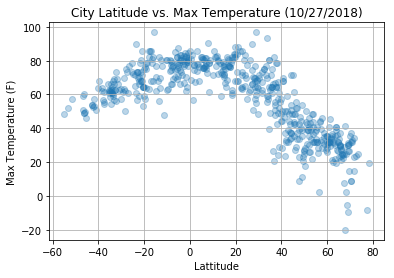

In [8]:
plt.scatter(Lat,Temp,alpha=0.3)
plt.title(f"City Latitude vs. Max Temperature ({date.strftime('%m/%d/%Y')})")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Lattitude vs Teperature.png")
plt.show()


#### Latitude vs. Humidity Plot

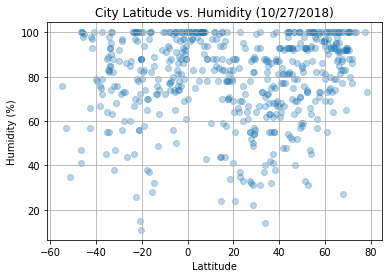

In [9]:
plt.scatter(Lat,Humid,alpha=0.3)
plt.title(f"City Latitude vs. Humidity ({date.strftime('%m/%d/%Y')})")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Lattitude vs Humidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

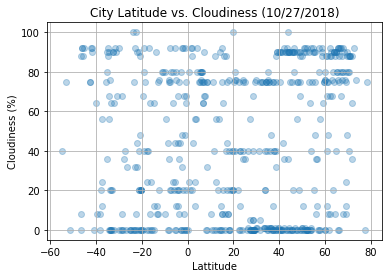

In [10]:
plt.scatter(Lat,Cloud,alpha=0.3)
plt.title(f"City Latitude vs. Cloudiness ({date.strftime('%m/%d/%Y')})")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Lattitude vs Cloudiness.png")
plt.show()


#### Latitude vs. Wind Speed Plot

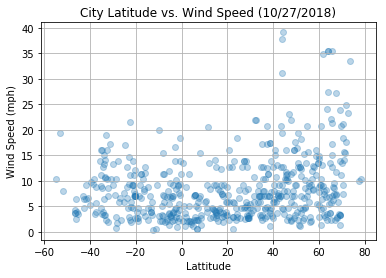

In [11]:
plt.scatter(Lat,Wind,alpha=0.3)
plt.title(f"City Latitude vs. Wind Speed ({date.strftime('%m/%d/%Y')})")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Lattitude vs Wind Speed.png")
plt.show()


# Conclusion

As previously concluded above, we can see a clear relationship between latitude and temperature. As cities get closer to the equator, the temperature goes up. We can also observe, the temperature between about (-20) and (20) degrees does not vary much. This is due to the tilt of the earth’s axis of about 23.5 degrees. What we're seeing is the range between the Tropic of Cancer and Tropic of Capricorn, the furthest two latitudes from the equator where the sun reaches zenith (directly overhead) at least once a year. Also due to the tilt of the earth’s axis, is the trend of the northern latitudes becoming colder than the southern latitudes with the change of seasons. 

There appears to be less of a trend between Humidity and latitude. Most cities are somewhere between 60% and 100% humidity. 

There also does not appear to be a trend between cloudiness and latitude, although we do see a large grouping around 0% and anther much smaller grouping around 90%

When comparing windspeed to latitude, it appears there may be a correlation. If we look at just the northern hemisphere, the occurrences of higher windspeeds go up with the latitude. It is difficult to tell with the southern hemisphere since we do not have as many southern hemisphere cities in our population. 

One struggle this dataset has is it entirely dependent upon data from cities located on land masses. The southern hemisphere makes up only just barely over 30% of the earths landmass, while the northern hemisphere makes up the remaining almost 70%. We have much more data available for the northern hemisphere.
